In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
import glob
# 抓取所有位置
folder_path = "/Users/imath/Desktop/TMBA/配對交易/pair trade data/1h"
file_list = glob.glob(folder_path + "/*.csv")

# 對位置排序
file_list = sorted(file_list)

# 先抓取 BTC 因為最長
# 只取 [['timestamp','close']]
main_dataframe_1h = pd.DataFrame(pd.read_csv('/Users/imath/Desktop/TMBA/配對交易/pair trade data/1h/BTC/BTCUSDT_1h.csv'))[['timestamp','close']]

for i in range(len(file_list)):
    data = pd.read_csv(file_list[i])[['timestamp','close']]
    # 缺失值 往後遞補
    #data['close'].fillna(method='ffill', inplace=True)
    #df = pd.DataFrame(data)
    main_dataframe_1h = pd.merge(main_dataframe_1h,data, on = 'timestamp', how = 'outer')

main_dataframe_1h

/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2924592438.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  main_dataframe_1h = pd.merge(main_dataframe_1h,data, on = 'timestamp', how = 'outer')
/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2924592438.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  main_dataframe_1h = pd.merge(main_dataframe_1h,data, on = 'timestamp', how = 'outer')
/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2924592438.py:18: FutureWarning: Passing 'suffixes' which cause duplicate columns {'close_x'} in the result is deprecated and will raise a MergeError in a future version.
  main_dataframe_1h = pd.merge(main_dataframe_1h,data, on = 'timestamp', how = 'outer')
/var/folders/2_/vqqcrgw52112

,timestamp,close_x,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close_x,...,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close_x,close_y,close
0,2017-08-17 04:00:00+00:00,4308.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-17 05:00:00+00:00,4315.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-17 06:00:00+00:00,4324.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-17 07:00:00+00:00,4349.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-17 08:00:00+00:00,4360.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46846,2022-12-26 09:00:00+00:00,16832.98,55.5,0.2596,0.1658,3.590,9.066,11.68,6.82,101.4,...,0.05471,NaN,5.158,NaN,NaN,0.01592,0.0738,145.1,0.3505,0.787
46847,2022-12-26 10:00:00+00:00,16847.65,55.8,0.2604,0.1664,3.581,9.074,11.71,6.84,101.9,...,0.05473,NaN,5.179,NaN,NaN,0.01592,0.0739,145.7,0.3513,0.789
46848,2022-12-26 11:00:00+00:00,16864.04,55.8,0.2607,0.1672,3.583,9.100,11.72,6.86,102.2,...,0.05483,NaN,5.186,NaN,NaN,0.01602,0.0740,146.7,0.3509,0.788
46849,2022-12-26 12:00:00+00:00,16858.93,55.7,0.2616,0.1690,3.596,9.081,11.75,6.85,102.4,...,0.05483,NaN,5.196,NaN,NaN,0.01604,0.0744,146.0,0.3523,0.791


In [7]:
# 給 columns 名稱
names = ['BTC']
for i in range(len(file_list)):
    name = file_list[i].split('/')[-1].split('USDT')[0]
    names.append(name)
# 設置 index 
main_dataframe_1h = main_dataframe_1h.set_index('timestamp')
main_dataframe_1h.columns = names


KeyError: "None of ['timestamp'] are in the columns"

In [8]:
main_dataframe_1h

,BTC,AAVE,ADA,ALGO,APE,ATOM,AVAX,AXS,BCH,BNB,...,TRX,TUSD,UNI,USDC,USDP,VET,XLM,XMR,XRP,XTZ
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4308.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00+00:00,4315.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00+00:00,4324.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00+00:00,4349.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00+00:00,4360.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 09:00:00+00:00,16832.98,55.5,0.2596,0.1658,3.590,9.066,11.68,6.82,101.4,242.7,...,0.05471,NaN,5.158,NaN,NaN,0.01592,0.0738,145.1,0.3505,0.787
2022-12-26 10:00:00+00:00,16847.65,55.8,0.2604,0.1664,3.581,9.074,11.71,6.84,101.9,243.3,...,0.05473,NaN,5.179,NaN,NaN,0.01592,0.0739,145.7,0.3513,0.789
2022-12-26 11:00:00+00:00,16864.04,55.8,0.2607,0.1672,3.583,9.100,11.72,6.86,102.2,243.3,...,0.05483,NaN,5.186,NaN,NaN,0.01602,0.0740,146.7,0.3509,0.788


In [9]:
main_dataframe_1h.to_csv('main_datafram_1h.csv')

In [10]:
df = pd.read_csv('/Users/imath/Desktop/TMBA/main_datafram_1h.csv')
main_dataframe_1h.loc['2021-01-01':]

,BTC,AAVE,ADA,ALGO,APE,ATOM,AVAX,AXS,BCH,BNB,...,TRX,TUSD,UNI,USDC,USDP,VET,XLM,XMR,XRP,XTZ
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,28995.13,88.097,0.18051,0.3460,NaN,6.401,3.2461,0.53441,341.44,37.3764,...,0.02680,0.9983,5.2241,0.9983,NaN,0.019238,0.12879,156.92,0.22162,2.0038
2021-01-01 01:00:00+00:00,29409.99,87.422,0.18358,0.3447,NaN,6.318,3.1709,0.53366,349.71,37.6134,...,0.02719,0.9981,5.1663,0.9982,NaN,0.019805,0.13304,160.01,0.22382,2.0605
2021-01-01 02:00:00+00:00,29194.65,87.882,0.18368,0.3542,NaN,6.378,3.0891,0.53321,354.37,37.9600,...,0.02728,0.9981,5.1846,0.9982,NaN,0.019792,0.13272,161.32,0.22361,2.0828
2021-01-01 03:00:00+00:00,29278.40,88.454,0.18292,0.3591,NaN,6.185,3.1085,0.54173,350.95,37.9250,...,0.02716,0.9981,5.1548,0.9981,NaN,0.019609,0.13084,159.75,0.22730,2.0724
2021-01-01 04:00:00+00:00,29220.31,87.431,0.18180,0.3525,NaN,6.087,3.0901,0.53912,348.21,37.8702,...,0.02705,0.9980,5.1118,0.9982,NaN,0.019718,0.13340,159.88,0.23898,2.0358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 09:00:00+00:00,16832.98,55.500,0.25960,0.1658,3.590,9.066,11.6800,6.82000,101.40,242.7000,...,0.05471,NaN,5.1580,NaN,NaN,0.015920,0.07380,145.10,0.35050,0.7870
2022-12-26 10:00:00+00:00,16847.65,55.800,0.26040,0.1664,3.581,9.074,11.7100,6.84000,101.90,243.3000,...,0.05473,NaN,5.1790,NaN,NaN,0.015920,0.07390,145.70,0.35130,0.7890
2022-12-26 11:00:00+00:00,16864.04,55.800,0.26070,0.1672,3.583,9.100,11.7200,6.86000,102.20,243.3000,...,0.05483,NaN,5.1860,NaN,NaN,0.016020,0.07400,146.70,0.35090,0.7880


In [12]:
main_dataframe_1h = main_dataframe_1h.sort_index()
main_dataframe_1h

,BTC,AAVE,ADA,ALGO,APE,ATOM,AVAX,AXS,BCH,BNB,...,TRX,TUSD,UNI,USDC,USDP,VET,XLM,XMR,XRP,XTZ
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00+00:00,4308.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00+00:00,4315.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00+00:00,4324.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00+00:00,4349.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00+00:00,4360.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 09:00:00+00:00,16832.98,55.5,0.2596,0.1658,3.590,9.066,11.68,6.82,101.4,242.7,...,0.05471,NaN,5.158,NaN,NaN,0.01592,0.0738,145.1,0.3505,0.787
2022-12-26 10:00:00+00:00,16847.65,55.8,0.2604,0.1664,3.581,9.074,11.71,6.84,101.9,243.3,...,0.05473,NaN,5.179,NaN,NaN,0.01592,0.0739,145.7,0.3513,0.789
2022-12-26 11:00:00+00:00,16864.04,55.8,0.2607,0.1672,3.583,9.100,11.72,6.86,102.2,243.3,...,0.05483,NaN,5.186,NaN,NaN,0.01602,0.0740,146.7,0.3509,0.788


In [ ]:
['BTC', 'AAVE', 'ADA', 'ALGO',  'ATOM', 'AVAX', 'AXS', 'BCH',
       'BNB', 'BUSD','DOGE', 'DOT', 'EGLD', 'EOS', 'ETC', 'ETH', 'FIL',
        'HBAR', 'ICP', 'LINK', 'LTC', 'MATIC', 'NEAR', 'SOL', 'THETA', 'TRX', 'TUSD', 'UNI', 'VET',
       'XLM', 'XMR', 'XRP', 'XTZ']

In [81]:
df = pd.read_csv('/Users/imath/Desktop/TMBA/main_datafram_1h.csv')
df = df.set_index('timestamp')

crypto = [ 'AAVE', 'ADA', 'ALGO',  'ATOM', 'AVAX', 'AXS', 'BCH',
       'BNB', 'DOGE', 'DOT', 'EGLD', 'EOS', 'ETC', 'ETH', 'FIL',
        'HBAR', 'ICP', 'LINK', 'LTC', 'MATIC', 'NEAR', 'SOL', 'THETA', 'TRX', 'UNI', 'VET',
       'XLM', 'XMR', 'XRP', 'XTZ']
etfs = ['BTC']

In [102]:
prices = df[[ 'AAVE', 'ADA', 'ALGO',  'ATOM', 'AVAX', 'AXS', 'BCH',
       'BNB', 'DOGE', 'DOT', 'EGLD', 'EOS', 'ETC', 'ETH', 'FIL',
        'HBAR', 'ICP', 'LINK', 'LTC', 'MATIC', 'NEAR', 'SOL', 'THETA', 'TRX', 'UNI', 'VET',
       'XLM', 'XMR', 'XRP', 'XTZ','BTC']]
prices.sort_index()
prices = prices.loc['2021-01-01':'2022-12-01']
prices

,AAVE,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,DOGE,DOT,...,SOL,THETA,TRX,UNI,VET,XLM,XMR,XRP,XTZ,BTC
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00+00:00,88.097,0.18051,0.3460,6.401,3.2461,0.53441,341.44,37.3764,0.004679,9.2609,...,1.5442,1.86184,0.02680,5.2241,0.019238,0.12879,156.92,0.22162,2.0038,28995.13
2021-01-01 01:00:00+00:00,87.422,0.18358,0.3447,6.318,3.1709,0.53366,349.71,37.6134,0.004737,9.2432,...,1.5734,1.84953,0.02719,5.1663,0.019805,0.13304,160.01,0.22382,2.0605,29409.99
2021-01-01 02:00:00+00:00,87.882,0.18368,0.3542,6.378,3.0891,0.53321,354.37,37.9600,0.004755,9.0809,...,1.5872,1.91200,0.02728,5.1846,0.019792,0.13272,161.32,0.22361,2.0828,29194.65
2021-01-01 03:00:00+00:00,88.454,0.18292,0.3591,6.185,3.1085,0.54173,350.95,37.9250,0.004978,9.1177,...,1.6029,1.97013,0.02716,5.1548,0.019609,0.13084,159.75,0.22730,2.0724,29278.40
2021-01-01 04:00:00+00:00,87.431,0.18180,0.3525,6.087,3.0901,0.53912,348.21,37.8702,0.004894,9.0600,...,1.6022,1.93700,0.02705,5.1118,0.019718,0.13340,159.88,0.23898,2.0358,29220.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00+00:00,65.100,0.31440,0.2438,10.441,12.9300,6.91000,112.90,298.4000,0.103880,5.4100,...,13.6400,0.95000,0.05434,5.8200,0.019210,0.08920,141.30,0.40750,1.0130,17062.85
2022-11-30 20:00:00+00:00,65.900,0.31670,0.2463,10.464,12.9900,6.95000,113.50,300.6000,0.104370,5.4500,...,13.7300,0.95500,0.05451,5.8600,0.019300,0.08970,141.30,0.40950,1.0130,17097.19
2022-11-30 21:00:00+00:00,65.700,0.32080,0.2480,10.500,13.0600,6.99000,113.30,300.7000,0.106000,5.4700,...,13.8700,0.95600,0.05459,5.8500,0.019250,0.08990,142.10,0.41030,1.0170,17106.65


In [103]:
returns = prices.pct_change().dropna()
returns

,AAVE,ADA,ALGO,ATOM,AVAX,AXS,BCH,BNB,DOGE,DOT,...,SOL,THETA,TRX,UNI,VET,XLM,XMR,XRP,XTZ,BTC
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-05-11 02:00:00+00:00,-0.029333,-0.019165,-0.021527,-0.033259,-0.038235,-0.027128,-0.032798,-0.013296,-0.021040,-0.015600,...,-0.034603,-0.025555,-0.029695,-0.015358,-0.023947,-0.038267,-0.015837,-0.020433,-0.037584,-0.017373
2021-05-11 03:00:00+00:00,0.011149,0.008090,0.007681,0.012984,0.011432,-0.001906,0.006310,0.003583,0.041061,-0.004121,...,-0.010871,0.014493,0.003093,0.001593,0.013180,0.009640,0.016780,0.001593,0.012490,0.009935
2021-05-11 04:00:00+00:00,0.013395,0.002654,0.021092,0.023880,0.015021,0.031319,0.014404,0.016349,0.029141,0.013025,...,0.008614,0.022352,0.023937,0.018336,0.021764,0.015871,0.014801,0.022634,0.017173,0.003529
2021-05-11 05:00:00+00:00,-0.008519,-0.003201,-0.001450,-0.007256,-0.012435,0.006707,-0.015583,-0.003668,-0.019689,-0.010499,...,-0.014872,-0.016255,-0.000475,-0.008331,-0.011066,-0.007002,0.001769,-0.005657,-0.008940,-0.009741
2021-05-11 06:00:00+00:00,0.023908,0.024582,0.015823,0.015983,0.046510,0.009483,0.023915,0.012760,-0.007811,0.018507,...,0.026855,0.021451,0.018869,0.014011,0.030204,0.024493,0.020911,0.013440,0.032274,0.016043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00+00:00,0.006182,0.003831,0.008688,0.011921,0.010946,0.010234,0.008036,0.002351,0.011588,0.005576,...,0.008130,0.005291,0.002953,0.010417,0.000521,0.009050,0.002839,0.018495,0.010978,0.008357
2022-11-30 20:00:00+00:00,0.012289,0.007316,0.010254,0.002203,0.004640,0.005789,0.005314,0.007373,0.004717,0.007394,...,0.006598,0.005263,0.003128,0.006873,0.004685,0.005605,0.000000,0.004908,0.000000,0.002013
2022-11-30 21:00:00+00:00,-0.003035,0.012946,0.006902,0.003440,0.005389,0.005755,-0.001762,0.000333,0.015618,0.003670,...,0.010197,0.001047,0.001468,-0.001706,-0.002591,0.002230,0.005662,0.001954,0.003949,0.000553


In [104]:
s_scores = pd.DataFrame(index=returns.index[120:], columns=crypto)
betas = pd.DataFrame(index=returns.index[120:], columns=crypto)

In [105]:
for t in returns.index[120:]:
    # prepare data
    tmp_ret = returns.loc[:t]
    tmp_ret = tmp_ret.iloc[-121:]
    tmp_ret = (tmp_ret - tmp_ret.mean()) / tmp_ret.std()
    
    ou_parameters = pd.DataFrame(index=crypto, columns=['a', 'b', 'Var(zeta)', 'kappa', 'm', 
                                                      'sigma', 'sigma_eq'])
    
    for stock in tmp_ret.columns.drop('BTC'):
        X = tmp_ret[['BTC']].values
        y = tmp_ret[stock].values
        model1 = LinearRegression().fit(X,y) 
        betas.loc[t,stock] = model1.coef_
        epsilon = y - model1.predict(X)

        # second regression
        Xk = epsilon.cumsum()
        X = Xk[:-1].reshape(-1,1)
        y = Xk[1:]
        model2 = LinearRegression().fit(X,y)
        a = model2.intercept_
        b = model2.coef_
        zeta = y - model2.predict(X)

        # OU parameters
        kappa = -np.log(b)*252
        m = a/(1-b)
        sigma = np.sqrt(np.var(zeta)*2*kappa/(1-b**2))
        sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))

        # if the speed of mean reversion is high enough, save the calculated parameters
        if kappa>252/30:
            ou_parameters.loc[stock] = [x.item() for x in [a,b,np.var(zeta),kappa,m,sigma,sigma_eq]]

    ou_parameters.dropna(axis=0, inplace=True)

    # calculate s-score
    ou_parameters['m_bar'] = (ou_parameters['a']/(1 - ou_parameters['b']) - 
                              ou_parameters['a'].mean()/(1-ou_parameters['b'].mean()))
    ou_parameters['s'] = -ou_parameters['m_bar'] / ou_parameters['sigma_eq']
    s_scores.loc[t] = ou_parameters['s']

/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2740306779.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2740306779.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))
/var/folders/2_/vqqcrgw52112241mx3hdsxsc0000gn/T/ipykernel_60532/2740306779.py:30: RuntimeWarning: invalid value encountered in sqrt
  sigma_eq = np.sqrt(np.var(zeta)/(1-b**2))


In [106]:
s_scores

,ADA,ATOM,BCH,BNB,DOGE,ETH,LINK,LTC,TRX,VET,XLM,XMR,XRP,XTZ,BTC
timestamp,,,,,,,,,,,,,,,
2021-05-16 02:00:00+00:00,0.803925,0.217038,-0.722947,-0.102201,0.455958,-0.916999,-0.142786,0.297351,0.07013,0.318385,0.91311,-0.895554,1.876939,-1.856536,NaN
2021-05-16 03:00:00+00:00,0.916163,-0.080437,-0.991017,-0.159663,0.395492,-0.963251,-0.307589,0.008739,-0.02853,0.655376,0.891192,-0.750035,1.985106,-2.021184,NaN
2021-05-16 04:00:00+00:00,1.138781,-0.012598,-0.877954,-0.452743,0.493943,-1.034041,-0.439216,0.007076,-0.16324,0.900795,1.103959,-0.537469,1.835894,-2.092927,NaN
2021-05-16 05:00:00+00:00,0.69774,0.154972,-1.107579,-0.39955,0.451753,-1.189205,-0.517479,-0.468065,-0.137925,0.851851,1.224609,-0.377658,1.910787,-1.845475,NaN
2021-05-16 06:00:00+00:00,1.092528,0.121983,-1.719157,-0.197999,0.343036,-1.117738,-0.585515,-0.268328,-0.074091,0.962742,1.143826,-0.306857,1.608644,-1.987337,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00+00:00,-0.888634,-0.233085,-0.0311,-1.632596,-0.781526,1.214325,-0.463799,-0.262082,-0.422283,1.635475,-0.218156,0.974568,0.909898,-0.506155,NaN
2022-11-30 20:00:00+00:00,-0.502122,-0.453207,0.020153,-1.50861,-0.971103,1.557745,-0.110134,-0.336913,-0.504839,1.314441,-0.139659,0.726756,1.309253,-0.648884,NaN
2022-11-30 21:00:00+00:00,0.061446,-0.485205,-0.281662,-1.590472,-0.926581,1.53552,-0.155753,-0.661496,-0.564106,0.696316,-0.159014,1.60348,1.626956,-0.513708,NaN


In [126]:
# calculate positions
algo_pos = pd.DataFrame(index=s_scores.index[1:], columns=crypto)

for s in crypto:
    positions = pd.DataFrame(index=s_scores.index, columns=[s])
    pos = 0
    for t in s_scores.index:
        score = s_scores.loc[t][s]
        if score>1.25:
            positions.loc[t][s] = -1 # open short
            pos = -1
        elif score<-1.25:
            positions.loc[t][s] = -1 # open long
            pos = 1
        elif score< 1  and pos==1: 
            positions.loc[t][s] = 0 # close short
            pos = 0
        elif score>-1 and pos==1:
            positions.loc[t][s] = 0 # close long
            pos = 0
        else:
            positions.loc[t][s] = pos # carry forward current position

    algo_pos[s] = positions

In [127]:
algo_pos

,ADA,ATOM,BCH,BNB,DOGE,ETH,LINK,LTC,TRX,VET,XLM,XMR,XRP,XTZ,BTC
timestamp,,,,,,,,,,,,,,,
2021-05-16 03:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0
2021-05-16 04:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0
2021-05-16 05:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,0
2021-05-16 06:00:00+00:00,0,0,-1,0,0,0,0,0,0,0,0,0,-1,-1,0
2021-05-16 07:00:00+00:00,0,0,-1,0,0,0,0,0,0,0,-1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-30 19:00:00+00:00,0,-1,-1,-1,0,-1,-1,-1,0,-1,0,0,-1,-1,0
2022-11-30 20:00:00+00:00,0,-1,-1,-1,0,-1,-1,-1,0,-1,0,0,-1,-1,0
2022-11-30 21:00:00+00:00,0,-1,-1,-1,0,-1,-1,-1,0,-1,0,-1,-1,-1,0


In [128]:
# calculate weights (allocate equal amount of capital to long\short positions)
algo_weights = pd.DataFrame(index=algo_pos.index, columns=select.columns)

for t in algo_pos.index:
    tmp = algo_pos.loc[t]
    tmp[tmp>0] /= sum(tmp>0) # equal weights among long positions
    tmp[tmp<0] /= sum(tmp<0) # equal weights among short positions
    algo_weights.loc[t] = tmp

In [129]:
# calculate positions in ETFs
#algo_weights['BTC'] = -np.stack((betas.iloc[1:,:]*algo_weights).sum(axis=1).values)

In [130]:
# calculate returns
ret = (returns.iloc[60:] * algo_weights.shift()).sum(axis=1) / abs(algo_weights.shift().replace(np.nan, 0)).sum(axis=1)/2
cumret = np.nancumprod(ret+1)



In [ ]:
# calculate returns of SPY and BBH for comparison
spy = pd.read_csv('spy_ohlc.csv', index_col=0)
spy_returns = spy['5. adjusted close'].pct_change()
spy_returns = spy_returns.loc[returns.index]
spy_cumret = np.nancumprod(spy_returns.iloc[60:]+1)
bbh_cumret = np.nancumprod(returns.iloc[60:]['BBH']+1)

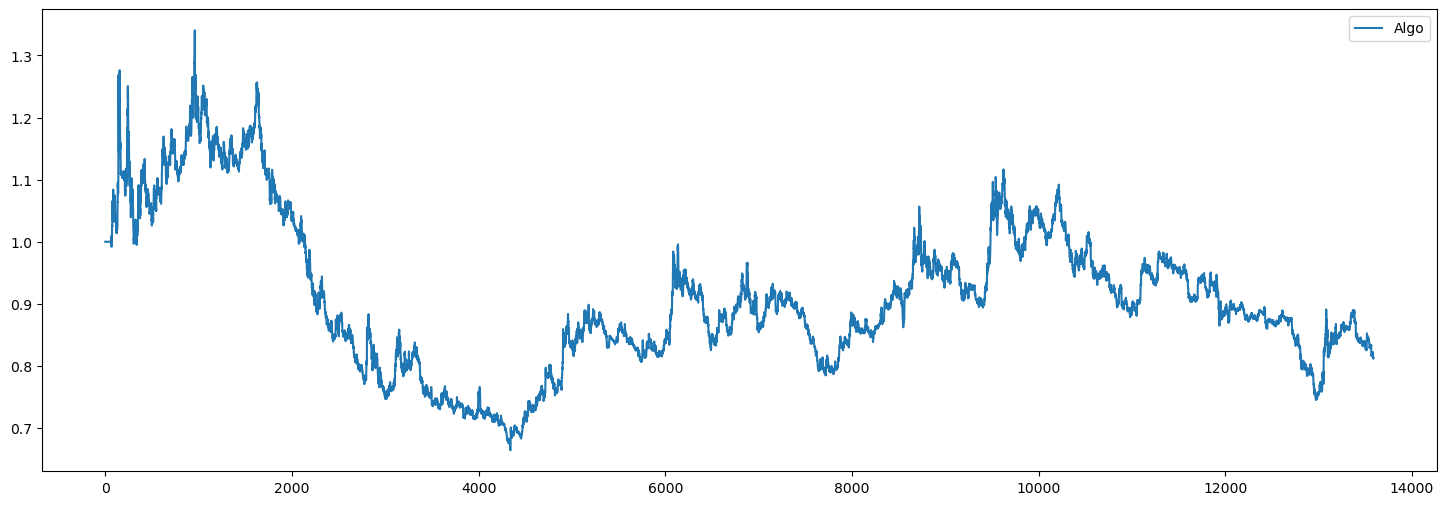

In [131]:
plt.figure(figsize=(18,6))
plt.plot(cumret, label='Algo')
#plt.plot(spy_cumret, label='SPY')
#plt.plot(bbh_cumret, label='BBH')
plt.legend()